In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

# print(sys.path)

import networkx as nx

from graphPlot import drawGraph, SIZE
from const import *

plt.rcParams['figure.figsize'] = SIZE
# print(plt.rcParams['figure.figsize'])

## Data Augmentation

- Form a group $\Bigg \{ A_{ug}, U_{ga}, G_{au} ...... \Bigg \}$, sometimes not commutative/Abelian

- $\subset \text{unary operator}: Signal \Longrightarrow Signal $ (making it a group action)
    
- $\subset \text{**higher-order function**}$

---

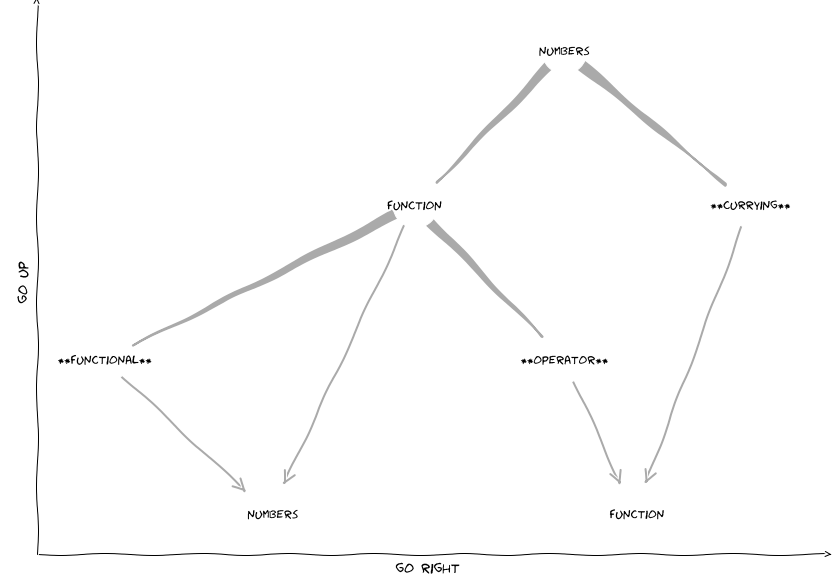

In [3]:

g = nx.DiGraph(directed=True)

n = 'numbers'
n2 = ' numbers'
f = 'function'
f2 = ' function'
o = '**operator**'
c = '**currying**'
fl = '**functional**'

g.add_nodes_from([n])
g.add_nodes_from([f, fl, o, c])
g.add_nodes_from([n2, f2])

g.add_edge(n, f, wedge=True)
g.add_edge(f, n2)
g.add_edge(f, o, wedge=True)
g.add_edge(o, f2)
g.add_edge(f, fl, wedge=True)
g.add_edge(fl, n2)
g.add_edge(n, c, wedge=True)
g.add_edge(c, f2)

drawGraph(g, font_family='humor sans',  arrow='-|>')

plt.show()

## Data Augmentation $\Longrightarrow$ G-ConvNet

**Lemma**: If the augmentation group $\{ A_{ug} \}$ satisifes:

- **Transitivity**: for any pair of points $x, y$ and any function $f$, we can always find an augmentation that can transform value $f(x)$ to point $y$
- **Group Equivariance**: applying an augmentation $A_{ug}$ on the input has the same effect as applying an augmentation $U_{ga}$ from the same group on the output

Then a fully connected layer:

$$
f_+(y) = <f(x), w(x, y)> _x
$$

collapses to a group convolution (**G-conv**) layer:

$$
f_+(y) = < \bbox[yellow]{A_{ug} \circ f(x)}, w_0(x)> _x
$$

---

Looks familiar?

$$
conv(f(- \Delta), w_0(\Delta)) = corr(f(\Delta), w_0(\Delta)) = \sum_{x \in \text{domain}} f(\Delta + x) w_0(x) _x = <\bbox[yellow]{f(\Delta + x)}, w_0(x)> _x
$$



## Data Augmentation - Transitivity

**Transitivity**: for any pair of points $x, y$ and any function $f$, we can always find an augmentation that can transform value $f(x)$ to point $y$

$$
\forall x : f(x) = \Big( A_{ug} \circ f \Big) (x_0)
$$

---

- Effectively means the augmentation group is the 'carriage' to move reference frame around the observer

<img src="assets/fcnd-frame.png">

--- 

[*] Image courtesy: udacity.com


## Data Augmentation - Equivariance

Plain old **Equivariance**: applying an augmentation $A_{ug}$ on the input has the same effect as applying $A_{ug}$ on the output

$$
A_{ug} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

---

- example: SQL prediate pushdown
- example: first input & final output of Masked-CNN & Autoencoder (& maybe Style Transfer)

<img src="assets/maskedCNN2.png"> | <img src="assets/maskedCNN1.png">
--- | ---

## Data Augmentation - Group Equivariance

**Group Equivariance**: applying an augmentation $A_{ug}$ on the input has the same effect as applying an augmentation **$U_{ga}$ from the same group** on the output

$$
U_{ga} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

---

- Relaxed a bit comparing to Plain old equivariance
- Effectively means that the architecture of the first layer can be carried over to the subsequent layers with little changes, applied on high-level features


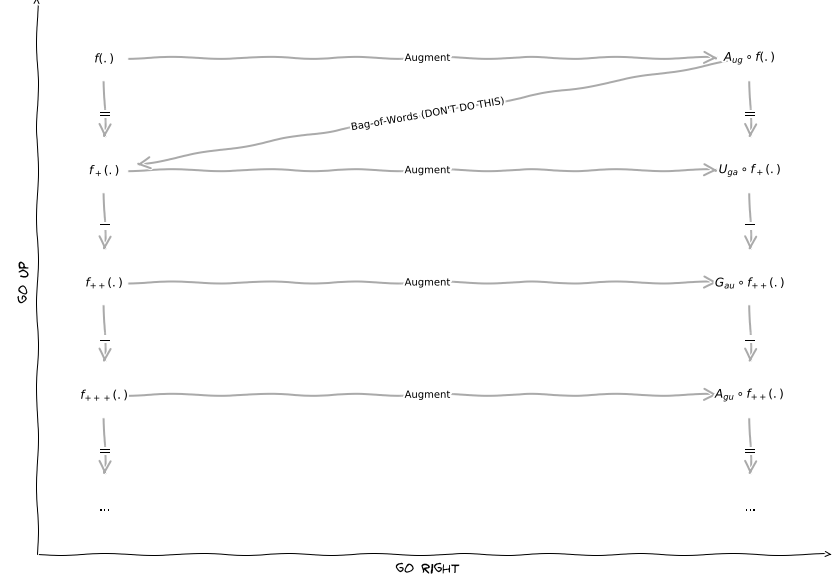

In [4]:

g = nx.DiGraph(directed=True)

fs = [
    "$f(.)$",
    "$f_+(.)$",
    "$f_{++}(.)$",
    "$f_{+++}(.)$",
    "..."
]

afs = [
    "$A_{ug} \circ f(.)$",
    "$U_{ga} \circ f_+(.)$",
    "$G_{au} \circ f_{++}(.)$",
    "$A_{gu} \circ f_{++}(.)$",
    " ... "
]

for i in range(0, 4):
    g.add_edge(fs[i], fs[i + 1], text='||')
    g.add_edge(afs[i], afs[i + 1], text='||')
#     g.add_edge(fs[i], afs[i])

g2 = g.copy()

for i in range(0, 4):
    g2.add_edge(fs[i], afs[i], text='Augment')

g2.add_edge(afs[0], fs[1], text='Bag-of-Words (DON\'T DO THIS)')

drawGraph(g2, layoutG=g)

plt.show()

## *Data Augmentation $\Longrightarrow$ G-ConvNet - Proof*

- **Transitivity**:

$$
\forall x : f(x) = \Big( \bar{A}_{ug} \circ f \Big) (x_0)
$$

- **Group equivariance**

$$
U_{ga} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

**Combining all together**:

$$
f_+(y) = \Big( \bar{U}_{ga} \circ f_+ \Big)(y_0) = <\bar{A}_{ug} \circ f(x), w(x, y_0)> _x = <\bbox[yellow]{\bar{A}_{ug} \circ f(x)}, w_0(x)> _x
$$

More rigorous proof available in*

---

[*] R. Kondor and S. Trivedi, “On the Generalization of Equivariance and Convolution in Neural Networks to the Action of Compact Groups” 2018